<a href="https://colab.research.google.com/github/Rohan171819/Deep_Learning./blob/main/Feature_Scaling_in_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np

In [60]:
df=pd.read_excel("CarFuelData.xlsx")

In [61]:
df.head(5)

,mpg,Cylinders,displacement,weight,acceleration,model year,car name,car name_numeric_data,car type,km(in 15 yrs.),Co2_Emission(Kg)
0,18.0,8,307.0,3504,12.0,70,buick skylark 320,101,Private Vehicle,114.750,114750.0
1,15.0,8,350.0,3693,11.5,70,plymouth satellite,102,Private Vehicle,95.625,95625.0
2,18.0,8,318.0,3436,11.0,70,amc rebel sst,103,Private Vehicle,114.750,114750.0
3,16.0,8,304.0,3433,12.0,70,ford,104,Private Vehicle,102.000,102000.0
4,17.0,8,302.0,3449,10.5,70,ford plymouth satellite,105,Private Vehicle,108.375,108375.0


In [62]:
df.info

<bound method DataFrame.info of       mpg  Cylinders  displacement  weight  acceleration  model year  \
0    18.0          8         307.0    3504          12.0          70   
1    15.0          8         350.0    3693          11.5          70   
2    18.0          8         318.0    3436          11.0          70   
3    16.0          8         304.0    3433          12.0          70   
4    17.0          8         302.0    3449          10.5          70   
..    ...        ...           ...     ...           ...         ...   
384  36.0          4         135.0    2370          13.0          82   
385  27.0          4         151.0    2950          17.3          82   
386  27.0          4         140.0    2790          15.6          82   
387  44.0          4          97.0    2130          24.6          82   
388  32.0          4         135.0    2295          11.6          82   

                    car name  car name_numeric_data            car type  \
0          buick skylark 320

In [63]:
# To chek whether any row is duplicated or not...
df.duplicated().sum()

0

In [64]:
# To check the Values of Car Type..
df[["car type"]].value_counts()

car type          
Commercial Vehicle    263
 Private Vehicle      126
dtype: int64

In [65]:
# To check the Values of Model Year of the Car..
df[["model year"]].value_counts()

model year
73            40
78            36
76            34
75            30
79            29
80            29
81            29
71            28
72            28
77            28
74            27
82            27
70            24
dtype: int64

In [66]:
df1=pd.get_dummies(df,columns=["car type"],drop_first=True)
df1.head(5)

,mpg,Cylinders,displacement,weight,acceleration,model year,car name,car name_numeric_data,km(in 15 yrs.),Co2_Emission(Kg),car type_Commercial Vehicle
0,18.0,8,307.0,3504,12.0,70,buick skylark 320,101,114.750,114750.0,0
1,15.0,8,350.0,3693,11.5,70,plymouth satellite,102,95.625,95625.0,0
2,18.0,8,318.0,3436,11.0,70,amc rebel sst,103,114.750,114750.0,0
3,16.0,8,304.0,3433,12.0,70,ford,104,102.000,102000.0,0
4,17.0,8,302.0,3449,10.5,70,ford plymouth satellite,105,108.375,108375.0,0


In [67]:
df1=df1.drop(columns=["car name","car name_numeric_data"])


In [68]:
df1.head(5)

,mpg,Cylinders,displacement,weight,acceleration,model year,km(in 15 yrs.),Co2_Emission(Kg),car type_Commercial Vehicle
0,18.0,8,307.0,3504,12.0,70,114.750,114750.0,0
1,15.0,8,350.0,3693,11.5,70,95.625,95625.0,0
2,18.0,8,318.0,3436,11.0,70,114.750,114750.0,0
3,16.0,8,304.0,3433,12.0,70,102.000,102000.0,0
4,17.0,8,302.0,3449,10.5,70,108.375,108375.0,0


In [69]:
# Splitting the data between Training and Testing..
X=df1.drop(columns=["Co2_Emission(Kg)"])
Y=df1[["Co2_Emission(Kg)"]]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=10)

In [70]:
# Scaling the values..
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)
print(X_train_scaled.shape)

(311, 8)


In [71]:
# Importing necessary liberaries..
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
# Creating the ANN Architecture..
model=Sequential()
# Creating 3 Nodes in the Hidden Layer and Adding Input data..
model.add(Dense(100,activation="relu",input_dim=8))
model.add(Dense(100,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(100,activation="relu"))
#Creating 1 Node in the Output Layer..
model.add(Dense(1,activation="linear"))

In [73]:
# Analyzing the summary of the Neural Network.
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 100)               900       
                                                                 
 dense_33 (Dense)            (None, 100)               10100     
                                                                 
 dense_34 (Dense)            (None, 100)               10100     
                                                                 
 dense_35 (Dense)            (None, 100)               10100     
                                                                 
 dense_36 (Dense)            (None, 100)               10100     
                                                                 
 dense_37 (Dense)            (None, 100)               10100     
                                                                 
 dense_38 (Dense)            (None, 100)              

In [74]:
callback = EarlyStopping(
    monitor="loss",
    min_delta=0.00001,
    patience=20,
    verbose=True,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

In [75]:
# Compiling my model..
model.compile(loss="mean_squared_error",optimizer="Adam",metrics=["accuracy"])

In [76]:
#In order to see the Weights,biases of the First Layer of the Neural Network..
model.layers[0].get_weights()

[array([[ 0.03818579,  0.04440053, -0.08479126, -0.10689436, -0.05097161,
          0.13849433, -0.09002578, -0.02395172, -0.1009426 , -0.00106698,
         -0.15825367, -0.13748628,  0.10523118,  0.1346258 , -0.0507597 ,
         -0.10432845,  0.03260009,  0.12658666, -0.09604897,  0.17539994,
          0.19272102,  0.00730404, -0.04626386, -0.11140396,  0.16204558,
         -0.22796421, -0.1466575 ,  0.17135914,  0.0447848 , -0.04879043,
          0.03430708,  0.04722713,  0.06110136,  0.14838304,  0.08187868,
          0.03858723, -0.01728341,  0.12869994,  0.03731541,  0.16642953,
         -0.12175022, -0.1987915 ,  0.15578042, -0.22799355,  0.16996132,
         -0.21569611,  0.02914415, -0.05706273, -0.0109307 , -0.15229398,
          0.12280013, -0.20641695,  0.13528688, -0.23367107, -0.21289644,
         -0.18917507, -0.1511124 ,  0.19564123,  0.06289421,  0.1314631 ,
          0.13590021,  0.15467523,  0.03804423,  0.1729451 , -0.03726017,
         -0.20937508,  0.21417983,  0.

In [81]:
# Training the Neural Network..
history=model.fit(X_train_scaled,Y_train,epochs=1000,callbacks=callback,batch_size=1)

Epoch 1/1000
311/311 [==============================] - 5s 4ms/step - loss: 5332060160.0000 - accuracy: 0.0000e+00
Epoch 2/1000
311/311 [==============================] - 2s 5ms/step - loss: 375767232.0000 - accuracy: 0.0000e+00
Epoch 3/1000
311/311 [==============================] - 2s 5ms/step - loss: 259274928.0000 - accuracy: 0.0000e+00
Epoch 4/1000
311/311 [==============================] - 1s 4ms/step - loss: 164902016.0000 - accuracy: 0.0000e+00
Epoch 5/1000
311/311 [==============================] - 1s 4ms/step - loss: 118231208.0000 - accuracy: 0.0000e+00
Epoch 6/1000
311/311 [==============================] - 1s 4ms/step - loss: 87326752.0000 - accuracy: 0.0000e+00
Epoch 7/1000
311/311 [==============================] - 1s 4ms/step - loss: 60233236.0000 - accuracy: 0.0000e+00
Epoch 8/1000
311/311 [==============================] - 1s 4ms/step - loss: 64779096.0000 - accuracy: 0.0000e+00
Epoch 9/1000
311/311 [==============================] - 1s 4ms/step - loss: 131379080.0000

In [82]:
#In order to see the Weights,biases of the Second Layer of the Neural Network..
model.layers[1].get_weights()

[array([[ 0.07852946,  0.12354106, -0.10802467, ...,  0.00898019,
         -0.12042297, -0.10417841],
        [ 0.10323052, -0.01441398, -0.09588666, ..., -0.02957685,
         -0.06291538,  0.16262017],
        [-0.06214435, -0.13919611,  0.00801088, ..., -0.13081414,
         -0.05066223,  0.05669276],
        ...,
        [ 0.14775525, -0.00365335,  0.15378103, ...,  0.01011968,
         -0.07686934, -0.0582835 ],
        [-0.12356973, -0.10449176, -0.03375922, ..., -0.03037827,
         -0.12558647, -0.11460417],
        [ 0.20677212, -0.04303619, -0.06726298, ...,  0.07963234,
          0.15991051, -0.10443206]], dtype=float32),
 array([ 0.39444894,  0.17731574,  0.36129698,  0.3332406 , -0.00600551,
         0.        ,  0.3613915 ,  0.3797703 ,  0.3516673 ,  0.32320404,
        -0.07737285,  0.3688864 , -0.00088873,  0.15325172,  0.25698093,
         0.15634207,  0.0722357 ,  0.34893614,  0.33589998,  0.2933602 ,
         0.30108312,  0.3543906 ,  0.15901783,  0.35856527,  0.350

In [83]:
# Prediction of Neural Network..
Y_Predicted=model.predict(X_test_scaled)

3/3 [==============================] - 0s 3ms/step


In [84]:
# Calulating the accuracy..
from sklearn.metrics import r2_score
r2_score(Y_test,Y_Predicted)

0.9448854560856202

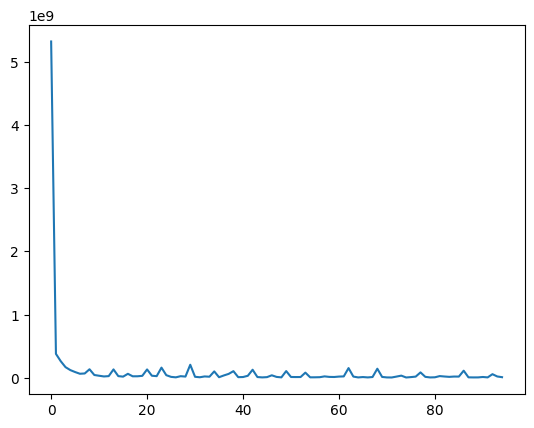

In [85]:
# Plotting the graph of accuracy..
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.show()